### Interaction Metrics

In [161]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as sp 

np.random.seed(42)

In [162]:
data = pd.read_csv('data/interaction_statistics.csv')

In [163]:
# save a set of the user ids
before = set(data['user'].tolist())

# merge the data with the ues data
data = data.merge(
    right = pd.read_csv('data/ues_responses.csv'), left_on = 'user', right_on = 'bbc_id',
    how = 'inner'
)

# drop the individual factor results from the dataframe
data = data.drop(columns = [
    'FA2', 'AE3', 'FA4', 'AE4', 'RW1', 'RW5', 'RW8', 'RW2', 'RW3', 'RW7', 'PU6', 'FA1', 'PU2', 
    'RW9', 'FA7', 'PU7', 'PU4', 'FA6', 'AE5', 'PU1', 'AE1', 'PU8', 'RW6', 'AE2', 'FA3', 'RW10', 
    'RW4', 'FA5', 'PU5', 'PU3', 'Unnamed: 0'
])

# test that it's worked
assert before == set(data['user'].tolist())

**Add the demographic group identifiers**

In [164]:
data['origami_experience'] = np.where(
    data['Origami'].isin(['Novice', 'Intermediate', 'Advanced', 'Expert']),
    'With Experience', 'No Experience'
)
data['tech_experience'] = np.where(
    data['Tech'].isin(['None', 'Novice', 'Intermediate']),
    'Little to None',
    'Advanced to Expert'
)

In [165]:
data.describe()

,hidden_time,time_to_completion,raw_session_length,avg_nec_time,std_nec_time,med_nec_time,norm_avg_nec_time,norm_std_nec_time,session_length,SP,...,BACK_BUTTON_CLICKED_proportion,NEXT_BUTTON_CLICKED_proportion,LINK_CHOICE_CLICKED_proportion,USER_SET_VARIABLE_proportion,total_events,FA-Score,AE-Score,PU-Score,RW-Score,UES-Score
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,...,39.000000,39.000000,39.0,39.0,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,11539.956000,46303.838744,64953.714949,2014.975791,10044.852753,75.206590,60.015175,301.699688,53413.758949,16.384615,...,0.000634,0.006667,0.0,0.0,110.871795,3.311026,3.610256,3.032051,3.171795,3.281282
std,65800.879739,186354.815196,193363.277151,6590.039581,34471.458319,33.749554,284.450294,1479.466451,187376.856821,13.589112,...,0.000663,0.001571,0.0,0.0,50.613177,0.873679,0.857105,1.049677,0.950886,0.813909
min,0.000000,-47450.570000,1017.846000,36.246071,32.543085,0.788000,0.732659,0.699218,-47425.607000,0.000000,...,0.000000,0.003006,0.0,0.0,59.000000,1.000000,1.200000,1.120000,1.000000,1.080000
25%,0.000000,1363.690500,2136.007500,75.596779,56.482169,58.671000,1.950768,1.239571,1920.692000,5.500000,...,0.000058,0.005466,0.0,0.0,73.000000,2.855000,3.200000,2.250000,2.550000,2.825000
50%,0.000000,2129.514000,2931.607000,99.240250,81.156987,66.714500,2.503892,1.851306,2549.677000,15.000000,...,0.000472,0.006744,0.0,0.0,109.000000,3.430000,3.600000,3.000000,3.200000,3.230000
75%,1.535000,2869.341500,4287.062000,138.362692,215.866790,87.804250,3.479200,3.591731,3427.552000,22.500000,...,0.000897,0.007973,0.0,0.0,121.500000,3.860000,4.200000,3.940000,3.900000,3.835000
max,411625.733000,934905.411000,935037.809000,33393.905714,173185.877708,187.442000,1755.795398,9115.388233,935034.045000,70.000000,...,0.002522,0.009492,0.0,0.0,306.000000,4.710000,5.000000,5.000000,4.800000,4.820000


**Data Processing**

We need to process the data in order to remove redundancies, for example, there appears to be a negative
values for the time to completion features - this shouldn't be possible but can occur due to the complication
in calculating the hidden time of the users.

In [166]:
# remove negative values - there shouldn't be any.
data = data[data.select_dtypes(include = [np.number]).ge(0).all(1)]
data.describe()

,hidden_time,time_to_completion,raw_session_length,avg_nec_time,std_nec_time,med_nec_time,norm_avg_nec_time,norm_std_nec_time,session_length,SP,...,BACK_BUTTON_CLICKED_proportion,NEXT_BUTTON_CLICKED_proportion,LINK_CHOICE_CLICKED_proportion,USER_SET_VARIABLE_proportion,total_events,FA-Score,AE-Score,PU-Score,RW-Score,UES-Score
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,...,37.000000,37.000000,37.0,37.0,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,916.610892,50097.700027,58507.526189,2039.525777,10190.283781,76.972432,62.024885,312.350216,57590.915297,16.864865,...,0.000645,0.006674,0.0,0.0,110.972973,3.289459,3.545946,3.013514,3.116216,3.241081
std,2566.503270,190625.631258,191921.615990,6760.600803,35370.896774,32.295184,292.061763,1519.074483,191520.506770,13.790420,...,0.000678,0.001613,0.0,0.0,51.714755,0.860723,0.830861,1.025238,0.934081,0.794826
min,0.000000,0.000000,1017.846000,36.246071,32.543085,12.682000,0.732659,0.699218,805.993000,0.000000,...,0.000000,0.003006,0.0,0.0,59.000000,1.000000,1.200000,1.120000,1.000000,1.080000
25%,0.000000,1683.534000,2035.244000,77.024172,54.399870,59.198500,1.965236,1.205182,1957.171000,5.000000,...,0.000000,0.005455,0.0,0.0,73.000000,3.000000,3.200000,2.380000,2.500000,2.800000
50%,0.000000,2154.738000,2830.520000,99.240250,79.155671,66.714500,2.503892,1.846336,2704.087000,15.000000,...,0.000472,0.006824,0.0,0.0,109.000000,3.430000,3.600000,3.000000,3.200000,3.190000
75%,0.000000,2880.332000,3876.701000,138.272348,199.293451,91.319500,3.391162,3.116713,3492.039000,23.000000,...,0.000909,0.008000,0.0,0.0,121.000000,3.860000,4.200000,3.880000,3.900000,3.760000
max,11863.369000,934905.411000,935037.809000,33393.905714,173185.877708,187.442000,1755.795398,9115.388233,935034.045000,70.000000,...,0.002522,0.009492,0.0,0.0,306.000000,4.710000,5.000000,5.000000,4.600000,4.630000


In [167]:
data.columns

Index(['user', 'hidden_time', 'time_to_completion', 'reach_end',
       'last_ne_seen', 'raw_session_length', 'avg_nec_time', 'std_nec_time',
       'med_nec_time', 'norm_avg_nec_time', 'norm_std_nec_time',
       'session_length', 'SP', 'MP', 'LP', 'VLP', 'SWITCH_VIEW_BUTTON_CLICKED',
       'PLAY_PAUSE_BUTTON_CLICKED', 'VIDEO_SCRUBBED',
       'CHANGE_CHAPTER_BUTTON_CLICKED', 'FULLSCREEN_BUTTON_CLICKED',
       'SUBTITLES_BUTTON_CLICKED', 'OVERLAY_BUTTON_CLICKED', 'VOLUME_CHANGED',
       'REPEAT_BUTTON_CLICKED', 'BROWSER_VISIBILITY_CHANGE',
       'BACK_BUTTON_CLICKED', 'NEXT_BUTTON_CLICKED', 'LINK_CHOICE_CLICKED',
       'USER_SET_VARIABLE', 'SWITCH_VIEW_BUTTON_CLICKED_proportion',
       'PLAY_PAUSE_BUTTON_CLICKED_proportion', 'VIDEO_SCRUBBED_proportion',
       'CHANGE_CHAPTER_BUTTON_CLICKED_proportion',
       'FULLSCREEN_BUTTON_CLICKED_proportion',
       'SUBTITLES_BUTTON_CLICKED_proportion',
       'OVERLAY_BUTTON_CLICKED_proportion', 'VOLUME_CHANGED_proportion',
       'REPE

In [168]:
# there are some columns that we are not interested in, i.e., the user set 
# variable (not used in the experience), that we can drop
data = data.drop(columns = [
    'USER_SET_VARIABLE', 'USER_SET_VARIABLE_proportion',
    'med_nec_time', 'norm_std_nec_time', 'raw_session_length', 'last_ne_seen', 'reach_end',
])

# convert the temporal features into the minute scale
temporal_features = ['hidden_time', 'time_to_completion', 'session_length']
data[temporal_features] = data[temporal_features].apply(lambda x: x / 60)

# remove columns where all values are zero - no information
data = data.drop(columns = data.columns[(data == 0).all()].tolist())

# convert the column names into something nicer
from lib.helpers import PRETTY_NAMES
data = data.rename(columns = PRETTY_NAMES)

In [169]:
# save the features
features = list(PRETTY_NAMES.values())
print(f"Number of features: {len(features)}")

Number of features: 35


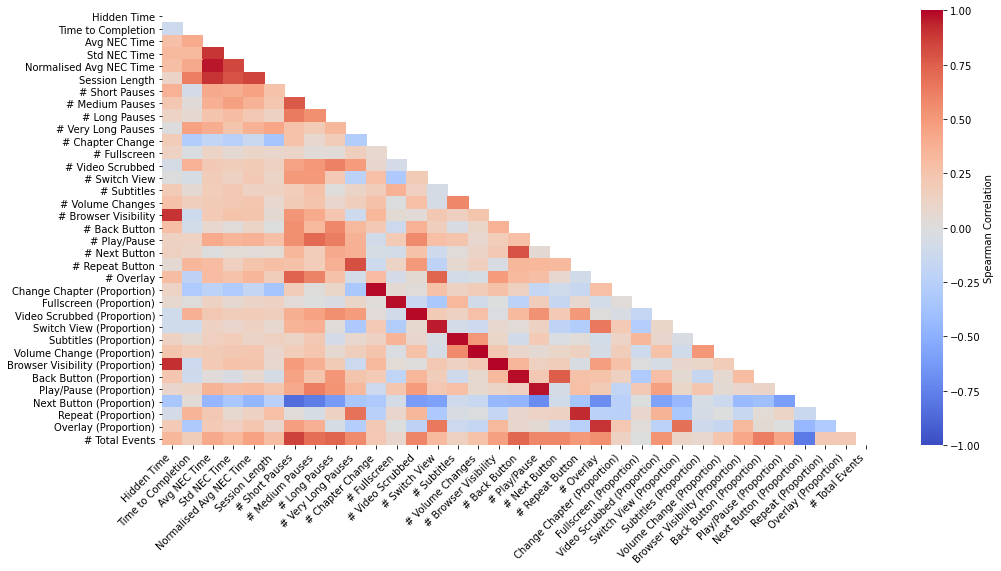

In [170]:
# test for correlation between features
fig, ax = plt.subplots(figsize = (16, 8))
p = sns.heatmap(
    data[features].corr(method = 'spearman'), 
    xticklabels = True, yticklabels = True, 
    ax = ax, vmin = -1.00, vmax = 1.00,
    cmap = sns.color_palette("coolwarm", as_cmap=True),
    cbar_kws = {'label': 'Spearman Correlation'},
    mask = np.triu(np.ones_like(data[features].corr(method = 'spearman'), dtype = np.bool))
)
p.set_xticklabels(p.get_xticklabels(), rotation = 45, ha = 'right')

plt.show()

* Negative correlation with next button compared to other metrics. This would make sense, if people are progressing through the experience using the next button then they're going to have few opportunities to interaction with the experience.
* Positive correlation between the number and proportion of browser visibility changes with hidden time - again makes sense.

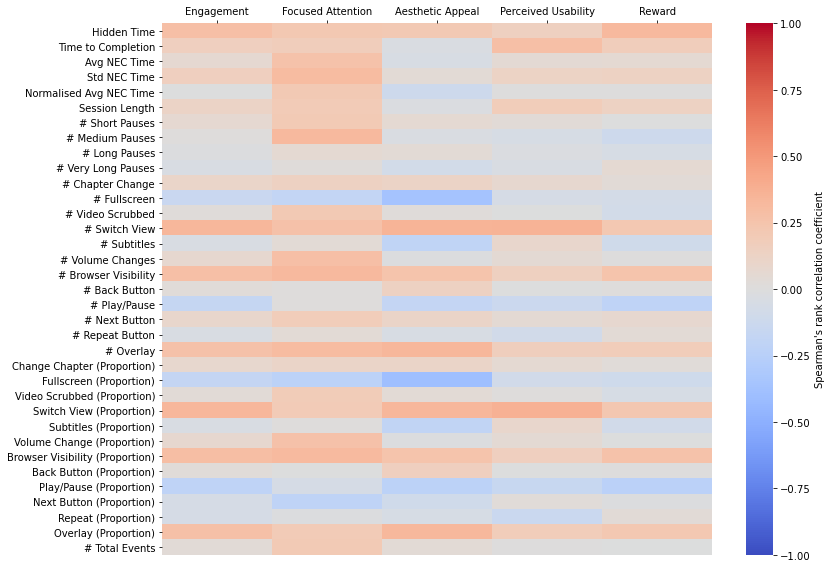

In [171]:
ues_factors = ['UES-Score', 'FA-Score', 'AE-Score', 'PU-Score', 'RW-Score']
fig, ax = plt.subplots(figsize = (12, 8))

p = sns.heatmap(
    data[features + ues_factors].corr(method = 'spearman').filter(ues_factors).drop(ues_factors), 
    xticklabels = True, yticklabels = True, 
    ax = ax, vmin = -1.00, vmax = 1.00,
    cmap = sns.color_palette("coolwarm", as_cmap=True),
    cbar_kws = {'label': "Spearman's rank correlation coefficient"}
)
p.xaxis.set_ticks_position('top')
p.set(
    xticklabels = [
        'Engagement', 'Focused Attention', 'Aesthetic Appeal', 'Perceived Usability', 'Reward'
    ]
)

plt.tight_layout()
plt.show()
# plt.savefig('plots/metrics-engagement-factors-correlations.png')

* Number of switch views is positively correlated with engagement - people switching cameras leads to a more engaged session. The signal for this looks to come from PU and AE - those that rated the experience more usable and liked the look tended to switch camera angles.
* add to

In [172]:
experience_mapper = {
    'With Experience': 1, 'No Experience': 0, 
    'Advanced to Expert': 1, 'Little to None': 0
}
data['origami_experience_bool'] = data.origami_experience.map(experience_mapper)
data['tech_experience_bool'] = data.tech_experience.map(experience_mapper)

origami_experience_results = {
    column_name: sp.pointbiserialr(x = data.origami_experience_bool.values, y = data[column_name].values)[0] # correlation
    for column_name in features
}
tech_experience_results = {
    column_name: sp.pointbiserialr(x = data.tech_experience_bool.values, y = data[column_name].values)[0] # correlation
    for column_name in features
}

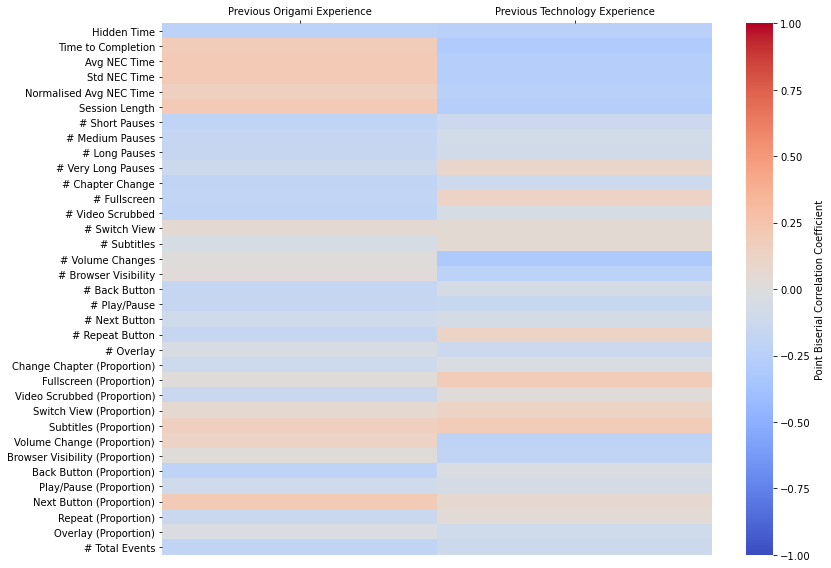

In [173]:
fig, ax = plt.subplots(figsize = (12, 8))

p = sns.heatmap(
    data = pd.DataFrame.from_dict([origami_experience_results, tech_experience_results]).round(2).T,
    ax = ax, vmin = -1.00, vmax = 1.00,
    cmap = sns.color_palette('coolwarm', as_cmap = True), 
    cbar_kws = {'label': 'Point Biserial Correlation Coefficient'}, 
    # annot = True
)
p.xaxis.set_ticks_position('top')
p.set(xticklabels = ['Previous Origami Experience', 'Previous Technology Experience'])
plt.tight_layout()
plt.show()
# plt.savefig('plots/metrics-demographics-correlations.png')


<AxesSubplot:xlabel='PU-Score', ylabel='# Switch View'>

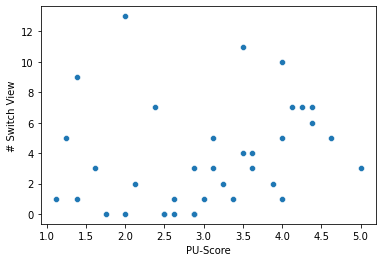

In [174]:
sns.scatterplot(x = 'PU-Score', y = '# Switch View', data = data)

**Statistical Differences between metrics and previous origami experience**

In [175]:
from lib.helpers import ues_difference_check

for feat in features:
    mwu_result, result_data = ues_difference_check(
        data = data, dv = feat, group = 'origami_experience_bool'
    )
    if result_data['sig_level'] != 'not significant':
        print(mwu_result, result_data)

No significant differences were found between interaction metrics and previous origami experience.

**Statistical differences between metrics and previous technology experience**

In [176]:
for feat in features: 
    mwu_result, result_data = ues_difference_check(
        data = data, dv = feat, group = 'tech_experience_bool'
    )
    if result_data['sig_level'] != 'not significant':
        print(mwu_result, result_data)

**Statistical Differences between metrics and engagement (plus factors)**

Engagement

In [177]:
# create the classification groups
for factor in ['FA', 'AE', 'PU', 'RW', 'UES']:
    data[f"{factor}-Group"] = np.where(
        data[f"{factor}-Score"] <= data[f"{factor}-Score"].median(), 0, 1 # 0 = low, 1 = high
    )

In [178]:
for feat in features: 
    stat_results, result_data = ues_difference_check(
        data = data, dv = feat, group = 'UES-Group'
    )
    if result_data['sig_level'] != 'not significant':
        print(feat, stat_results, result_data)
        print('Group size:')
        print(data['UES-Group'].value_counts())
        print()

# Switch View      U-val       tail     p-val       RBC      CLES
MWU  238.0  two-sided  0.041285 -0.391813  0.695906 {'normal': False, 'equal_var': True, 'sig_level': 'significant at < 0.05'}
Group size:
0    19
1    18
Name: UES-Group, dtype: int64

Switch View (Proportion)      U-val       tail     p-val       RBC      CLES
MWU  240.0  two-sided  0.036433 -0.403509  0.701754 {'normal': False, 'equal_var': True, 'sig_level': 'significant at < 0.05'}
Group size:
0    19
1    18
Name: UES-Group, dtype: int64



In [179]:
for feat in features: 
    stat_results, result_data = ues_difference_check(
        data = data, dv = feat, group = 'FA-Group'
    )
    if result_data['sig_level'] != 'not significant':
        print(feat, stat_results, result_data)
        print('Group size:')
        print(data['PU-Group'].value_counts())
        print()

No significant differences found between metrics and focused attention (high/low)

In [180]:
for feat in features: 
    stat_results, result_data = ues_difference_check(
        data = data, dv = feat, group = 'AE-Group'
    )
    if result_data['sig_level'] != 'not significant':
        print(feat, stat_results, result_data)
        print('Group size:')
        print(data['PU-Group'].value_counts())
        print()

No significant differences found between metrics and aesthetic appeal

In [181]:
for feat in features: 
    stat_results, result_data = ues_difference_check(
        data = data, dv = feat, group = 'PU-Group'
    )
    if result_data['sig_level'] != 'not significant':
        print(feat, stat_results, result_data)
        print('Group size:')
        print(data['PU-Group'].value_counts())
        print()

# Switch View      U-val       tail     p-val       RBC      CLES
MWU  265.0  two-sided  0.004115 -0.549708  0.774854 {'normal': False, 'equal_var': True, 'sig_level': 'significant at < 0.05'}
Group size:
0    19
1    18
Name: PU-Group, dtype: int64

Switch View (Proportion)      U-val       tail     p-val       RBC      CLES
MWU  270.0  two-sided  0.002627 -0.578947  0.789474 {'normal': False, 'equal_var': True, 'sig_level': 'significant at < 0.05'}
Group size:
0    19
1    18
Name: PU-Group, dtype: int64



In [182]:
for feat in features: 
    stat_results, result_data = ues_difference_check(
        data = data, dv = feat, group = 'RW-Group'
    )
    if result_data['sig_level'] != 'not significant':
        print(feat, stat_results, result_data)

No significant differences between reward and interaction metrics

Plots for the significant differences between switch views (count and proportion) and usability

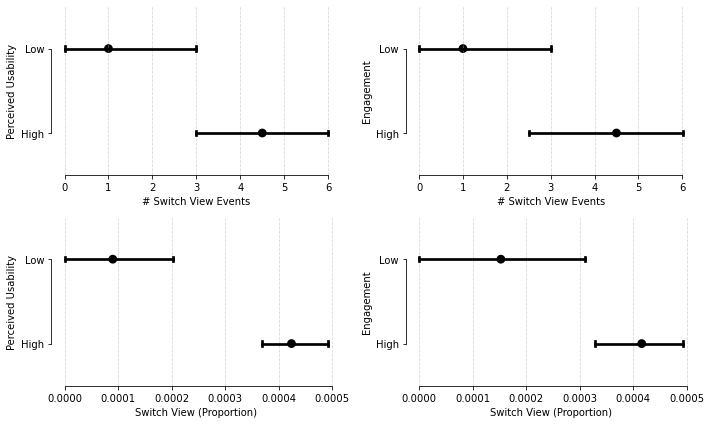

In [183]:
fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize = (10,6))

for feat, ax, group in zip(
    ['# Switch View', '# Switch View', 'Switch View (Proportion)', 'Switch View (Proportion)'], 
    axes.ravel(), 
    ['PU-Group', 'UES-Group', 'PU-Group', 'UES-Group']
):
    p = sns.pointplot(
        y = group, x = feat, data = data, ax = ax, 
        join = False, capsize = 0.05, color = 'black', 
        orient = 'h', estimator = np.median
    )
    if feat == '# Switch View': xlabel = '# Switch View Events'
    else: xlabel = feat 

    if group == 'PU-Group': ylabel = 'Perceived Usability'
    else: ylabel = 'Engagement'

    p.set(ylabel = ylabel, xlabel = xlabel, yticklabels = ['Low', 'High'])
    p.xaxis.grid(True, alpha = 0.5, linestyle = 'dashed')

sns.despine(trim = True)
plt.tight_layout()
# plt.show()
plt.savefig('plots/pu-ues-switch-view-effects.png')

**Modelling**

In [184]:
from lib.helpers import initial_modelling

for factor in ['FA', 'AE', 'PU', 'RW', 'UES']:
    print(factor)
    print(initial_modelling(X = data[features], y = data[f"{factor}-Score"], regression = True), '\n')

FA
[('neg_mean_squared_error', 1.144, 1.721), ('neg_mean_absolute_error', 0.81, 0.699), ('neg_root_mean_squared_error', 0.81, 0.699)] 

AE
[('neg_mean_squared_error', 0.884, 1.191), ('neg_mean_absolute_error', 0.757, 0.558), ('neg_root_mean_squared_error', 0.757, 0.558)] 

PU
[('neg_mean_squared_error', 1.606, 2.416), ('neg_mean_absolute_error', 0.984, 0.799), ('neg_root_mean_squared_error', 0.984, 0.799)] 

RW
[('neg_mean_squared_error', 1.57, 1.905), ('neg_mean_absolute_error', 1.07, 0.652), ('neg_root_mean_squared_error', 1.07, 0.652)] 

UES
[('neg_mean_squared_error', 1.068, 1.343), ('neg_mean_absolute_error', 0.866, 0.563), ('neg_root_mean_squared_error', 0.866, 0.563)] 



In [185]:
# include the origami and tech experience as features
data_with_demographics = pd.get_dummies(
    data[features + ['origami_experience', 'tech_experience']], 
    columns = ['origami_experience', 'tech_experience'], 
    drop_first = True
).rename(columns = {
    'origami_experience_With Experience': 'origami_experience_bool', 
    'tech_experience_Little to None': 'tech_experience_bool'
})

for factor in ['FA', 'AE', 'PU', 'RW', 'UES']:
    print(factor)
    print(initial_modelling(
        X = data_with_demographics[features + ['origami_experience_bool', 'tech_experience_bool']], 
        y = data[f"{factor}-Score"], 
        regression = True), 
        '\n')

FA
[('neg_mean_squared_error', 0.995, 1.357), ('neg_mean_absolute_error', 0.81, 0.582), ('neg_root_mean_squared_error', 0.81, 0.582)] 

AE
[('neg_mean_squared_error', 1.299, 1.714), ('neg_mean_absolute_error', 0.897, 0.703), ('neg_root_mean_squared_error', 0.897, 0.703)] 

PU
[('neg_mean_squared_error', 1.681, 2.086), ('neg_mean_absolute_error', 1.065, 0.739), ('neg_root_mean_squared_error', 1.065, 0.739)] 

RW
[('neg_mean_squared_error', 1.753, 2.653), ('neg_mean_absolute_error', 1.046, 0.812), ('neg_root_mean_squared_error', 1.046, 0.812)] 

UES
[('neg_mean_squared_error', 1.241, 1.399), ('neg_mean_absolute_error', 0.973, 0.543), ('neg_root_mean_squared_error', 0.973, 0.543)] 



Classification

In [186]:
for factor in ['FA', 'AE', 'PU', 'RW', 'UES']:
    print(factor)
    print(initial_modelling(X = data[features], y = data[f"{factor}-Group"], regression = False), '\n')

FA
[('accuracy', 0.297, 0.457), ('precision', 0.027, 0.162), ('recall', 0.027, 0.162), ('f1_weighted', 0.027, 0.162)] 

AE
[('accuracy', 0.405, 0.491), ('precision', 0.135, 0.342), ('recall', 0.135, 0.342), ('f1_weighted', 0.135, 0.342)] 

PU
[('accuracy', 0.622, 0.485), ('precision', 0.351, 0.477), ('recall', 0.351, 0.477), ('f1_weighted', 0.351, 0.477)] 

RW
[('accuracy', 0.378, 0.485), ('precision', 0.162, 0.369), ('recall', 0.162, 0.369), ('f1_weighted', 0.162, 0.369)] 

UES
[('accuracy', 0.541, 0.498), ('precision', 0.27, 0.444), ('recall', 0.27, 0.444), ('f1_weighted', 0.27, 0.444)] 



In [187]:
for factor in ['FA', 'AE', 'PU', 'RW', 'UES']:
    print(factor)
    print(initial_modelling(
            X = data_with_demographics[features + ['origami_experience_bool', 'tech_experience_bool']], 
            y = data[f"{factor}-Group"], 
            regression = False
        ), 
        '\n'
    )

FA
[('accuracy', 0.351, 0.477), ('precision', 0.081, 0.273), ('recall', 0.081, 0.273), ('f1_weighted', 0.081, 0.273)] 

AE
[('accuracy', 0.459, 0.498), ('precision', 0.135, 0.342), ('recall', 0.135, 0.342), ('f1_weighted', 0.135, 0.342)] 

PU
[('accuracy', 0.622, 0.485), ('precision', 0.351, 0.477), ('recall', 0.351, 0.477), ('f1_weighted', 0.351, 0.477)] 

RW
[('accuracy', 0.432, 0.495), ('precision', 0.216, 0.412), ('recall', 0.216, 0.412), ('f1_weighted', 0.216, 0.412)] 

UES
[('accuracy', 0.486, 0.5), ('precision', 0.216, 0.412), ('recall', 0.216, 0.412), ('f1_weighted', 0.216, 0.412)] 



Optimised Model - Regression

In [188]:
from lib.model import optimised_model

model, score = optimised_model(data[features], data['UES-Score'])
print(f"Best parameters: {model.get_params()}")
print(f"Best MSE: {score}")

Best parameters: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'max_depth': 8, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 7, 'min_samples_split': 0.5789268091721024, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
Best MSE: -0.5237534912946513


**Optimised Model -- Classification**

In [189]:
clf_model, clf_score = optimised_model(data[features], data['UES-Group'], regression = False)

print(f"Best model: {clf_model.get_params()}")
print(f"Best score: {clf_score}")

Best model: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 18, 'min_samples_split': 0.09199778301266236, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
Best score: 0.7567567567567568


In [190]:
from lib.model import experiment
import warnings, os, pickle  
warnings.filterwarnings('ignore')

if not os.path.exists('data/experiment_results.p'):
    experiment_results = experiment(
        data, features, 
        [
            'UES-Score', 'UES-Group', 'PU-Score', 'PU-Group', 'FA-Score', 'FA-Group', 
            'AE-Score', 'AE-Group', 'RW-Score', 'RW-Group'
        ]
    )

    data_with_demographics = pd.get_dummies(
        data, 
        columns = ['origami_experience', 'tech_experience'], 
        drop_first = True
    ).rename(columns = {
        'origami_experience_With Experience': 'Prior Origami Experience', 
        'tech_experience_Little to None': 'Techology Familiarity'
    })

    experiment_results_with_demo = experiment(
        data_with_demographics, features + ['Prior Origami Experience', 'Techology Familiarity'],
        [
            'UES-Score', 'UES-Group', 'PU-Score', 'PU-Group', 'FA-Score', 'FA-Group', 
            'AE-Score', 'AE-Group', 'RW-Score', 'RW-Group'
        ]
    )

    pickle.dump(experiment_results, open('data/experiment_results.p', 'wb'))
    pickle.dump(experiment_results_with_demo, open('data/experiment_results_demo.p', 'wb'))
else:
    experiment_results = pickle.load(open('data/experiment_results.p', 'rb'))
    experiment_results_with_demo = pickle.load(open('data/experiment_results_demo.p', 'rb'))

print("Results from models trained on interaction metrics")
for target, results in experiment_results.items():
    print(f"{target}: {results['scores']['best_score']}")

print('Results from models trained on interaction metrics + demographics')
for target, results in experiment_results_with_demo.items():
    print(f"{target}: {results['scores']['best_score']}")

Results from models trained on interaction metrics
UES-Score: 0.524
UES-Group: 75.7
PU-Score: 0.823
PU-Group: 81.10000000000001
FA-Score: 0.558
FA-Group: 67.60000000000001
AE-Score: 0.648
AE-Group: 70.3
RW-Score: 0.796
RW-Group: 73.0
Results from models trained on interaction metrics + demographics
UES-Score: 0.517
UES-Group: 75.7
PU-Score: 0.83
PU-Group: 81.10000000000001
FA-Score: 0.542
FA-Group: 64.9
AE-Score: 0.617
AE-Group: 67.60000000000001
RW-Score: 0.624
RW-Group: 64.9


In [191]:
def performance_metrics(results, demo = False):
    clf_results, reg_results = [], []

    for target, results in results.items():
        datum = {}
        for name, score in results['scores'].items():
            datum[name] = score 
        datum['target'] = target 
        datum['demo'] = demo 

        if 'Score' in target:
            reg_results.append(datum)
        else:
            clf_results.append(datum)
    
    return clf_results, reg_results

performance_results_clf, performance_results_reg = performance_metrics(experiment_results, demo = False)
performance_metrics_clf_demo, performance_results_reg_demo = performance_metrics(experiment_results_with_demo, demo = True)

clf_results = performance_results_clf + performance_metrics_clf_demo
reg_results = performance_results_reg + performance_results_reg_demo

clf_results = pd.DataFrame(clf_results)
reg_results = pd.DataFrame(reg_results)

In [192]:
clf_results[clf_results.target == 'UES-Group'][['acc', 'f1', 'precision', 'recall', 'auc', 'target', 'demo']]

,acc,f1,precision,recall,auc,target,demo
0,75.7,75.7,73.7,77.8,75.7,UES-Group,False
5,75.7,75.7,73.7,77.8,75.7,UES-Group,True


In [193]:
clf_results[clf_results.target == 'UES-Group'][['acc', 'f1', 'precision', 'recall', 'auc']].pct_change() * 100

,acc,f1,precision,recall,auc
0,NaN,NaN,NaN,NaN,NaN
5,0.0,0.0,0.0,0.0,0.0


In [194]:
reg_results[reg_results.target == 'RW-Score']

,mse,rmse,mae,r2,best_score,target,demo
4,0.714,0.845,0.703,0.159,0.796,RW-Score,False
9,0.581,0.762,0.597,0.316,0.624,RW-Score,True


In [195]:
reg_results[reg_results.target == 'RW-Score'][['mse', 'rmse', 'mae', 'r2']].pct_change() * 100

,mse,rmse,mae,r2
4,NaN,NaN,NaN,NaN
9,-18.627451,-9.822485,-15.078236,98.742138


**Regression - Feature Importances**

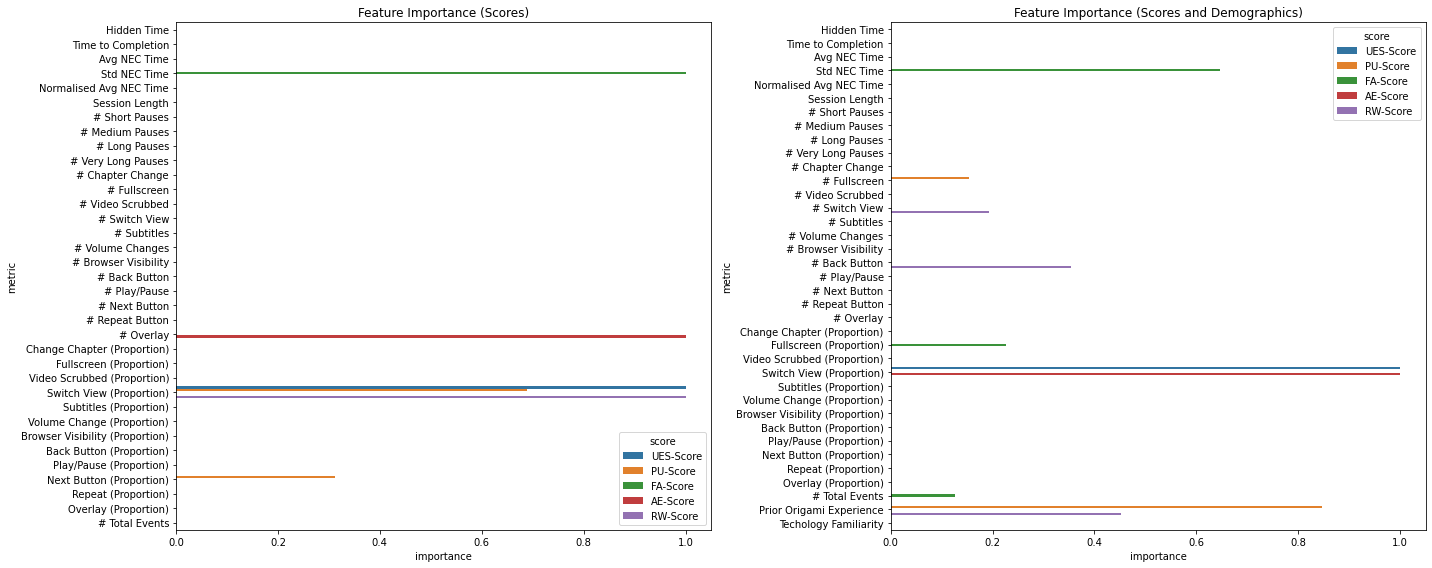

In [196]:
from lib.helpers import feature_importance_plotting_data

scores = ['UES-Score', 'PU-Score', 'FA-Score', 'AE-Score', 'RW-Score']
groups = ['UES-Group', 'PU-Group', 'FA-Group', 'AE-Group', 'RW-Group']

# importance without demographics
reg_feature_importance = feature_importance_plotting_data(
    experiment_results, 
    features, scores, 
    melt = True, 
    drop_all_zeroes = True
)

# importance with demographics
reg_feature_importance_demo = feature_importance_plotting_data(
    experiment_results_with_demo, 
    features + ['Prior Origami Experience', 'Techology Familiarity'],
    scores, 
    melt = True,
    drop_all_zeroes = True
)

fig, ax = plt.subplots(ncols = 2, figsize = (20, 8))
p = sns.barplot(
    data = reg_feature_importance, x = 'importance', y = 'metric', hue = 'score', 
    ax = ax[0]
)
q = sns.barplot(
    data = reg_feature_importance_demo, x = 'importance', y = 'metric', hue = 'score',
    ax = ax[1]
)
p.set(title = 'Feature Importance (Scores)')
q.set(title = 'Feature Importance (Scores and Demographics)')

plt.tight_layout()
plt.show()

In [197]:
from lib.helpers import feature_importance_as_dataframe

feature_imp_reg = feature_importance_as_dataframe(experiment_results_with_demo, groups)
feature_imp_reg

,target,column,feat_imp
0,UES-Group,Hidden Time,0.0
1,UES-Group,Time to Completion,0.0
2,UES-Group,Avg NEC Time,0.0
3,UES-Group,Std NEC Time,0.0
4,UES-Group,Normalised Avg NEC Time,0.0
...,...,...,...
180,RW-Group,Repeat (Proportion),0.0
181,RW-Group,Overlay (Proportion),0.0
182,RW-Group,# Total Events,0.0
183,RW-Group,Prior Origami Experience,0.0


In [198]:
sort = feature_imp_reg.sort_values(by = ['target', 'feat_imp'], ascending = False)
sort[sort.target == 'RW-Group']

,target,column,feat_imp
161,RW-Group,# Switch View,1.0
148,RW-Group,Hidden Time,0.0
149,RW-Group,Time to Completion,0.0
150,RW-Group,Avg NEC Time,0.0
151,RW-Group,Std NEC Time,0.0
152,RW-Group,Normalised Avg NEC Time,0.0
153,RW-Group,Session Length,0.0
154,RW-Group,# Short Pauses,0.0
155,RW-Group,# Medium Pauses,0.0
156,RW-Group,# Long Pauses,0.0


In [199]:
clf_feature_importance = feature_importance_plotting_data(experiment_results, features, groups)
clf_feature_importance

,metric,UES-Group,PU-Group,FA-Group,AE-Group,RW-Group
0,Hidden Time,0.0,0.0,0.420405,0.000000,0.000000
1,Time to Completion,0.0,0.0,0.000000,0.000000,0.000000
2,Avg NEC Time,0.0,0.0,0.000000,0.000000,0.485615
3,Std NEC Time,0.0,0.0,0.000000,0.000000,0.000000
4,Normalised Avg NEC Time,0.0,0.0,0.000000,0.000000,0.000000
5,Session Length,0.0,0.0,0.000000,0.000000,0.000000
6,# Short Pauses,0.0,0.0,0.000000,0.000000,0.000000
7,# Medium Pauses,0.0,0.0,0.000000,0.000000,0.000000
8,# Long Pauses,0.0,0.0,0.000000,0.000000,0.000000
9,# Very Long Pauses,0.0,0.0,0.000000,0.000000,0.000000


Demonstrates that a lot of features aren't important at all. UES-Score prediction solely relies on the proportion of switch views. The introduction of technology experience shows that PU score relies solely on that to predict. 

**Classification - Feature Importance**

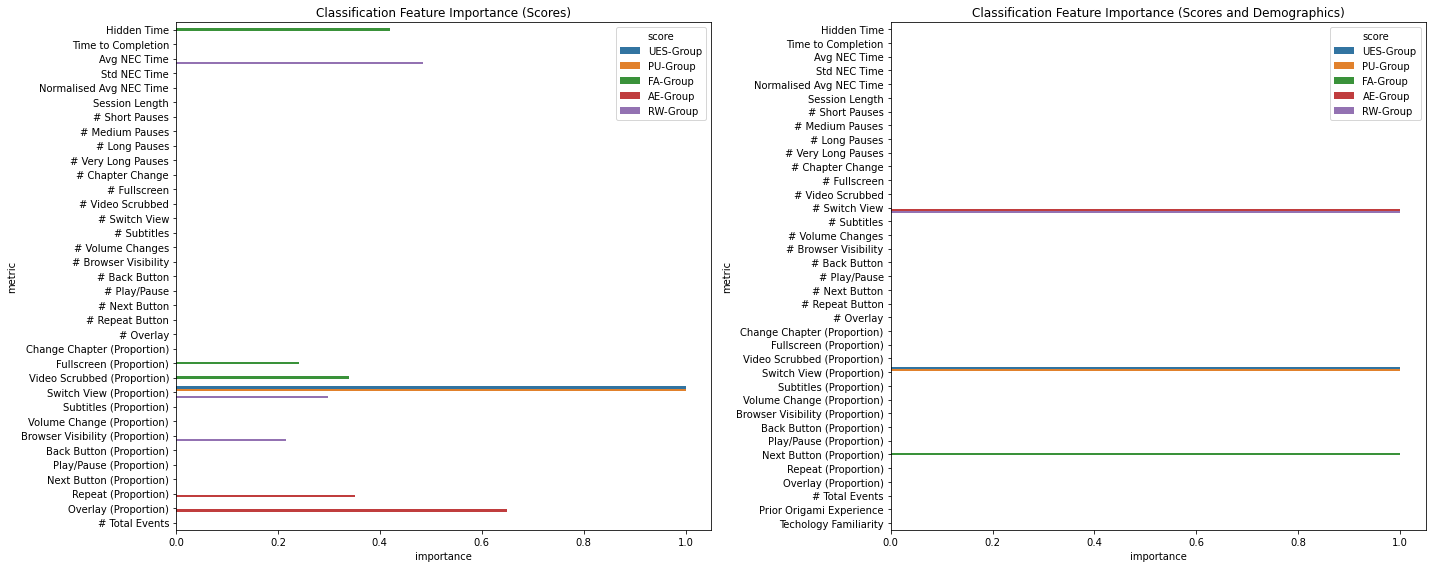

In [200]:
clf_feature_importance = feature_importance_plotting_data(
    experiment_results, 
    features, groups, 
    melt = True, 
    drop_all_zeroes = True
)

# importance with demographics
clf_feature_importance_demo = feature_importance_plotting_data(
    experiment_results_with_demo, 
    features + ['Prior Origami Experience', 'Techology Familiarity'],
    groups, 
    melt = True,
    drop_all_zeroes = True
)

fig, ax = plt.subplots(ncols = 2, figsize = (20, 8))
p = sns.barplot(
    data = clf_feature_importance, x = 'importance', y = 'metric', hue = 'score', 
    ax = ax[0]
)
q = sns.barplot(
    data = clf_feature_importance_demo, x = 'importance', y = 'metric', hue = 'score',
    ax = ax[1]
)
p.set(title = 'Classification Feature Importance (Scores)')
q.set(title = 'Classification Feature Importance (Scores and Demographics)')

plt.tight_layout()
plt.show()

In [201]:
from lib.helpers import feature_importance_as_dataframe

feature_imp_clf = feature_importance_as_dataframe(experiment_results_with_demo, scores)
feature_imp_clf 

,target,column,feat_imp
0,UES-Score,Hidden Time,0.000000
1,UES-Score,Time to Completion,0.000000
2,UES-Score,Avg NEC Time,0.000000
3,UES-Score,Std NEC Time,0.000000
4,UES-Score,Normalised Avg NEC Time,0.000000
...,...,...,...
180,RW-Score,Repeat (Proportion),0.000000
181,RW-Score,Overlay (Proportion),0.000000
182,RW-Score,# Total Events,0.000000
183,RW-Score,Prior Origami Experience,0.451613


In [202]:
# sort = permutation_results_clf.sort_values(by = ['target', 'mean'], ascending = False)
# sort[sort.target == 'RW-Score']
sort = feature_imp_clf.sort_values(by = ['target', 'feat_imp'], ascending = False)
sort[sort.target == 'RW-Score']

,target,column,feat_imp
183,RW-Score,Prior Origami Experience,0.451613
165,RW-Score,# Back Button,0.354839
161,RW-Score,# Switch View,0.193548
148,RW-Score,Hidden Time,0.000000
149,RW-Score,Time to Completion,0.000000
150,RW-Score,Avg NEC Time,0.000000
151,RW-Score,Std NEC Time,0.000000
152,RW-Score,Normalised Avg NEC Time,0.000000
153,RW-Score,Session Length,0.000000
154,RW-Score,# Short Pauses,0.000000


Switch view is again important in the classification task. Technology experience has some importance here.

**Regression Permutation Importance**

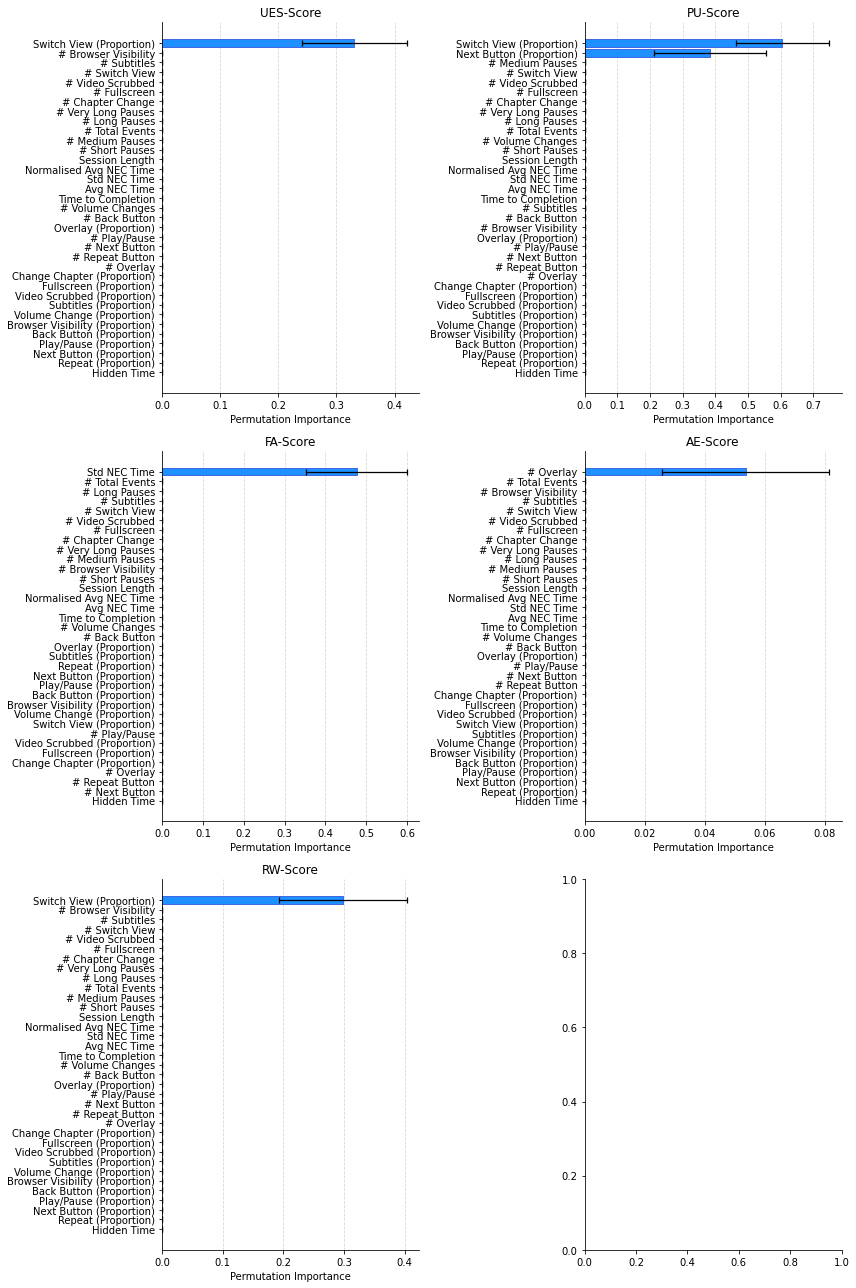

In [203]:
from lib.helpers import permutation_importance_plotting_data

permutation_results_regression = permutation_importance_plotting_data(experiment_results, features, scores)

fig, axes = plt.subplots(ncols = 2, nrows = 3, figsize = (12, 18))

error_kw = dict(lw = 1.25, capsize = 3, capthick = 1.25)
for idx, ax in enumerate(axes.ravel()[:-1]):
    ax.barh(
        permutation_results_regression[scores[idx]]['columns_sorted'], 
        permutation_results_regression[scores[idx]]['columns_m'], 
        xerr = permutation_results_regression[scores[idx]]['columns_std'],
        align = 'center', error_kw = error_kw, 
        color = 'dodgerblue', edgecolor = 'royalblue'
    )
    ax.xaxis.grid(True, alpha = 0.5, linestyle = 'dashed')
    ax.set_axisbelow(True)
    ax.set_xlabel('Permutation Importance')
    ax.set_title(scores[idx])

sns.despine()
plt.tight_layout()
plt.show()


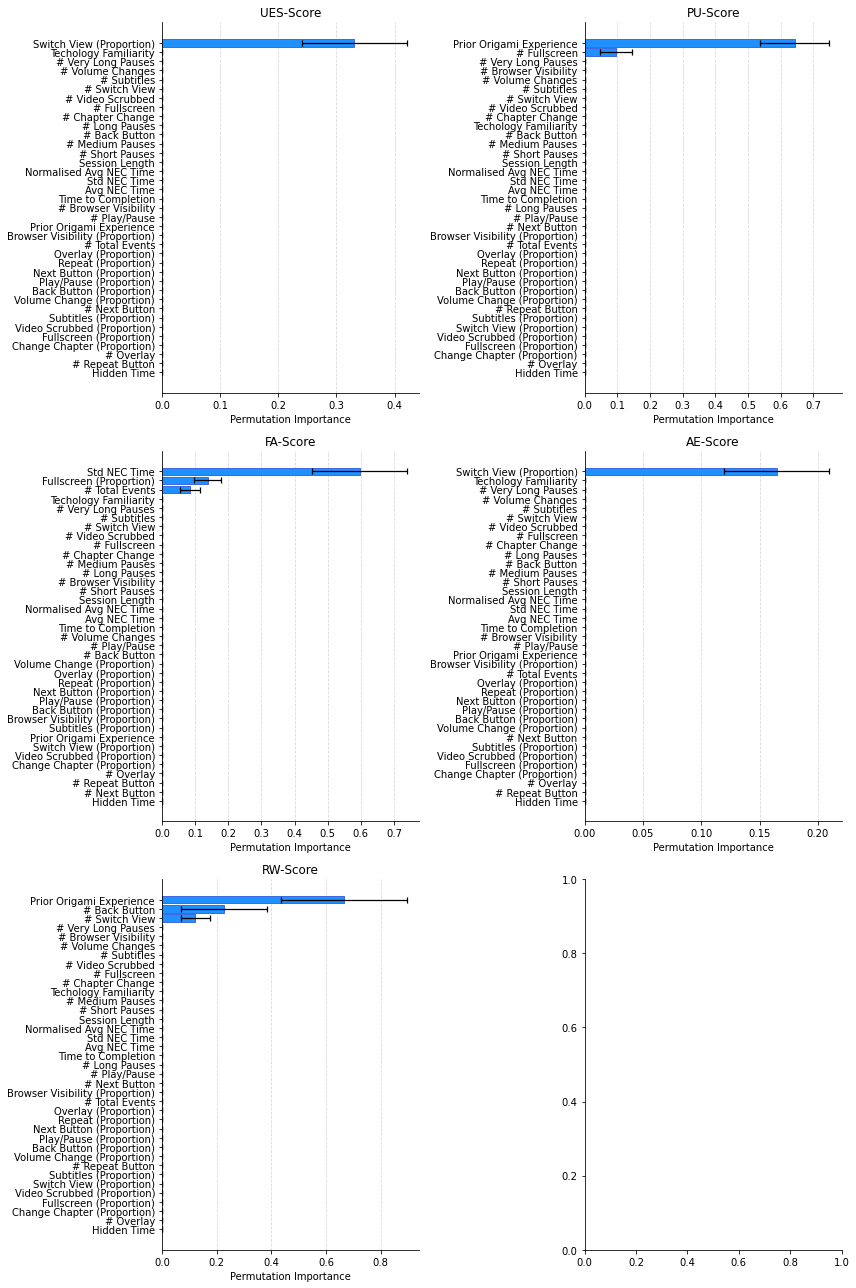

In [204]:
permutation_results_regression_with_demo = permutation_importance_plotting_data(
    experiment_results_with_demo, 
    features + ['Prior Origami Experience', 'Techology Familiarity'],
    scores
)

fig, axes = plt.subplots(ncols = 2, nrows = 3, figsize = (12, 18))

error_kw = dict(lw = 1.25, capsize = 3, capthick = 1.25)
for idx, ax in enumerate(axes.ravel()[:-1]):
    ax.barh(
        permutation_results_regression_with_demo[scores[idx]]['columns_sorted'], 
        permutation_results_regression_with_demo[scores[idx]]['columns_m'], 
        xerr = permutation_results_regression_with_demo[scores[idx]]['columns_std'],
        align = 'center', error_kw = error_kw, 
        color = 'dodgerblue', edgecolor = 'royalblue'
    )
    ax.xaxis.grid(True, alpha = 0.5, linestyle = 'dashed')
    ax.set_axisbelow(True)
    ax.set_xlabel('Permutation Importance')
    ax.set_title(scores[idx])

sns.despine()
plt.tight_layout()
plt.show()

In [205]:
from lib.helpers import permutation_importance_as_dataframe
permutation_results_reg = permutation_importance_as_dataframe(experiment_results_with_demo, groups)
permutation_results_reg

,target,column,mean,std
0,UES-Group,Hidden Time,0.0,0.0
1,UES-Group,Time to Completion,0.0,0.0
2,UES-Group,Avg NEC Time,0.0,0.0
3,UES-Group,Std NEC Time,0.0,0.0
4,UES-Group,Normalised Avg NEC Time,0.0,0.0
...,...,...,...,...
180,RW-Group,Repeat (Proportion),0.0,0.0
181,RW-Group,Overlay (Proportion),0.0,0.0
182,RW-Group,# Total Events,0.0,0.0
183,RW-Group,Prior Origami Experience,0.0,0.0


In [211]:
sort = permutation_results_reg.sort_values(by = ['target', 'mean'], ascending = False)
sort[sort.target == 'RW-Group']

,target,column,mean,std
161,RW-Group,# Switch View,0.176577,0.093555
148,RW-Group,Hidden Time,0.000000,0.000000
149,RW-Group,Time to Completion,0.000000,0.000000
150,RW-Group,Avg NEC Time,0.000000,0.000000
151,RW-Group,Std NEC Time,0.000000,0.000000
152,RW-Group,Normalised Avg NEC Time,0.000000,0.000000
153,RW-Group,Session Length,0.000000,0.000000
154,RW-Group,# Short Pauses,0.000000,0.000000
155,RW-Group,# Medium Pauses,0.000000,0.000000
156,RW-Group,# Long Pauses,0.000000,0.000000


**Classification Permutation Importance**

In [42]:
permutation_results_clf = permutation_importance_as_dataframe(experiment_results_with_demo, scores)
permutation_results_clf

,target,column,mean,std
0,UES-Score,Hidden Time,0.000000,0.000000
1,UES-Score,Time to Completion,0.000000,0.000000
2,UES-Score,Avg NEC Time,0.000000,0.000000
3,UES-Score,Std NEC Time,0.000000,0.000000
4,UES-Score,Normalised Avg NEC Time,0.000000,0.000000
...,...,...,...,...
180,RW-Score,Repeat (Proportion),0.000000,0.000000
181,RW-Score,Overlay (Proportion),0.000000,0.000000
182,RW-Score,# Total Events,0.000000,0.000000
183,RW-Score,Prior Origami Experience,0.664563,0.230893


In [61]:
sort = permutation_results_clf.sort_values(by = ['target', 'mean'], ascending = False)
sort[sort.target == 'RW-Score']

,target,column,mean,std
183,RW-Score,Prior Origami Experience,0.664563,0.230893
165,RW-Score,# Back Button,0.226766,0.157510
161,RW-Score,# Switch View,0.121743,0.053608
148,RW-Score,Hidden Time,0.000000,0.000000
149,RW-Score,Time to Completion,0.000000,0.000000
150,RW-Score,Avg NEC Time,0.000000,0.000000
151,RW-Score,Std NEC Time,0.000000,0.000000
152,RW-Score,Normalised Avg NEC Time,0.000000,0.000000
153,RW-Score,Session Length,0.000000,0.000000
154,RW-Score,# Short Pauses,0.000000,0.000000
